# Data Science Project Workflow

## Project Overview
- **Objective**: Define the problem and goals of the project.
- **Milestones**: Data Collection, Exploration, Preprocessing, Advanced Analysis, Model Development, Deployment, and Final Documentation.

---

## Domain and Research Questions

### Domain of the Project
Education Analytics

### Research Questions to be Answered
1. **Question 1**: To what extent does parental education level influence student academic performance across different subjects?  
2. **Question 2**: How does performance vary across different educational systems?  
3. **Question 3**: Are most students satisfied with online learning?  
4. **Question 4**: Do students under higher academic pressure achieve higher academic performance compared to those with less pressure?

---

# Team Information

## Student Information
- **Name**: Saif Hossam Farahat  
- **Email**: sf2300459@tkh.edu.eg  
- **Role**: Data Science Student  
- **Institution**: Coventry University

## Additional Information
- **Project Timeline**: [Insert Start Date - End Date]  
- **Tools Used**: [Insert List of Tools or Frameworks, e.g., Python, SQLite, Pandas, etc.]  
- **Advisor/Instructor**: [Insert Advisor/Instructor Name, if applicable]  
- **Contact for Inquiries**: [Insert Email or Point of Contact]

---

# Milestone 1: Data Collection, Exploration, and Preprocessing

## Data Collection
- Acquire a dataset from reliable sources (e.g., Kaggle, UCI Repository, or APIs).
- **Scraping Data**:
  - Increase dataset size through web scraping or APIs (e.g., Selenium, BeautifulSoup).
  - Explore public repositories or other accessible sources for additional data.

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
import csv

# Set up WebDriver using webdriver-manager
s = Service(ChromeDriverManager().install())
d = webdriver.Chrome(service=s)

courses = [
    "https://www.coursera.org/learn/learning-how-to-learn/reviews"
]

all_reviews = []
mreviews = 1000  # Maximum reviews per course

for x in courses:
    print(f"Scraping: {x}")
    page = 1
    reviews = []

    while len(reviews) < mreviews:
        d.get(f"{x}?page={page}")
        time.sleep(3)  # Allow time for page to load

        # Find reviews (try multiple possible class names)
        review_class_names = ["css-1w3pq1n", "reviewText", "css-10d64w1"]
        elements = []
        for class_name in review_class_names:
            elements = d.find_elements(By.CLASS_NAME, class_name)
            if elements:
                break

        if not elements:
            print(f"No more reviews found on page {page} for {x}.")
            break

        for element in elements:
            if len(reviews) >= mreviews:
                break
            reviews.append(element.text)

        print(f"Page {page}: {len(reviews)} reviews collected so far.")
        page += 1

    all_reviews.extend(reviews)

# Save reviews to CSV
with open("coursera_reviews.csv", "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Review Text"])
    for review in all_reviews:
        writer.writerow([review])

print(f"Scraping complete. Total reviews scraped: {len(all_reviews)}")
d.quit()

## Dataset Description
- Create a table to explain:
  - **Column Names**
  - **Data Types**
  - **Descriptions**
  - **Potential Use in Analysis**

In [6]:
import pandas as pd
from tabulate import tabulate

# Load the studperlt2.csv dataset
df_studperlt2 = pd.read_csv('/Users/saifgamed/Desktop/studperlt2.csv')  # Replace with your file path

# Only keep columns relevant to the analysis of education type 
relevant_columns_studperlt2 = [
    "Father Degree", "Mother Degree", "Education Type"
]

# Descriptions and potential uses for this dataset
column_info_studperlt2 = {
    "Father Degree": [
        "The highest level of education completed by the student's father.",
        "Analyze how father’s education level affects overall student performance."
    ],
    "Mother Degree": [
        "The highest level of education completed by the student's mother.",
        "Analyze how mother’s education level affects overall student performance."
    ],
    "Education Type": [
        "The type of educational curriculum (e.g., IB, Thanaweya).",
        "Compare outcomes across different education systems."
    ]
}

# Function to generate metadata
def generate_metadata(df, relevant_columns, column_info):
    metadata = []
    for col in relevant_columns:
        if col in df.columns:
            desc, use = column_info.get(col, ["No description.", "No analysis info."])
            metadata.append([col, str(df[col].dtype), desc, use])
    return pd.DataFrame(metadata, columns=["Column Name", "Data Type", "Description", "Potential Use in Analysis"])

# Generate and display the metadata for studperlt2 dataset
summary_studperlt2 = generate_metadata(df_studperlt2, relevant_columns_studperlt2, column_info_studperlt2)
print(tabulate(summary_studperlt2, headers='keys', tablefmt='grid'))

+----+----------------+-------------+-------------------------------------------------------------------+---------------------------------------------------------------------------+
|    | Column Name    | Data Type   | Description                                                       | Potential Use in Analysis                                                 |
+====+================+=============+===================================================================+===========================================================================+
|  0 | Father Degree  | object      | The highest level of education completed by the student's father. | Analyze how father’s education level affects overall student performance. |
+----+----------------+-------------+-------------------------------------------------------------------+---------------------------------------------------------------------------+
|  1 | Mother Degree  | object      | The highest level of education completed by the stud

In [7]:
import pandas as pd
from tabulate import tabulate

# Load the Student Depression Dataset.csv dataset
df_depression = pd.read_csv('/Users/saifgamed/Desktop/Student Depression Dataset.csv')  # Replace with your file path

# Only keep columns relevant to academic pressure, CGPA, and depression
relevant_columns_depression = [
    "Academic Pressure", "Depression", "CGPA"
]

# Descriptions and potential uses for this dataset
column_info_depression = {
    "Academic Pressure": [
        "The reported academic pressure a student feels, on a scale.",
        "Analyze the correlation between academic pressure and depression."
    ],
    "Depression": [
        "A measure of the level of depression in students (binary or scale).",
        "Examine how academic pressure contributes to depression in students."
    ],
    "CGPA": [
        "Cumulative Grade Point Average, reflecting overall academic performance.",
        "Analyze CGPA variations based on academic pressure and depression levels."
    ]
}

# Function to generate metadata
def generate_metadata(df, relevant_columns, column_info):
    metadata = []
    for col in relevant_columns:
        if col in df.columns:
            desc, use = column_info.get(col, ["No description.", "No analysis info."])
            metadata.append([col, str(df[col].dtype), desc, use])
    return pd.DataFrame(metadata, columns=["Column Name", "Data Type", "Description", "Potential Use in Analysis"])

# Generate and display the metadata for the Student Depression Dataset
summary_depression = generate_metadata(df_depression, relevant_columns_depression, column_info_depression)
print(tabulate(summary_depression, headers='keys', tablefmt='grid'))

+----+-------------------+-------------+--------------------------------------------------------------------------+---------------------------------------------------------------------------+
|    | Column Name       | Data Type   | Description                                                              | Potential Use in Analysis                                                 |
+====+===================+=============+==========================================================================+===========================================================================+
|  0 | Academic Pressure | float64     | The reported academic pressure a student feels, on a scale.              | Analyze the correlation between academic pressure and depression.         |
+----+-------------------+-------------+--------------------------------------------------------------------------+---------------------------------------------------------------------------+
|  1 | Depression        | int64       |

## Data Exploration
- Summary statistics (mean, median, variance).
- Identify missing values, duplicates, and outliers.
- Data distribution visualizations: histograms, box plots, scatter plots.

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords (first time only)
nltk.download("stopwords")

# Load scraped reviews
df = pd.read_csv("coursera_reviews.csv")

# Remove duplicates
df = df.drop_duplicates()

# Remove empty and very short reviews (e.g., less than 10 characters)
df = df[df["Review Text"].str.len() > 10]

# Normalize text: lowercasing and removing extra spaces
df["Review Text"] = df["Review Text"].str.lower().str.strip()

# Remove special characters, excessive punctuation, and numbers
df["Review Text"] = df["Review Text"].apply(lambda x: re.sub(r"[^a-zA-Z\s]", "", x))

# (Optional) Remove stopwords
stop_words = set(stopwords.words("english"))
df["Review Text"] = df["Review Text"].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))

# Save cleaned data
df.to_csv("cleaned_reviews.csv", index=False)

print("Cleaning complete! Saved as 'cleaned_reviews.csv'.")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from textblob import TextBlob

# Load the cleaned reviews
df = pd.read_csv("cleaned_reviews.csv")


# Perform Sentiment Analysis
df["Sentiment Score"] = df["Review Text"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df["Sentiment"] = df["Sentiment Score"].apply(lambda x: 
    "Positive" if x > 0.2 else ("Negative" if x < -0.2 else "Neutral"))

# 🔹 **Histogram: Sentiment Distribution**
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Sentiment", palette={"Positive": "green", "Neutral": "gray", "Negative": "red"})
plt.title("Sentiment Distribution of Reviews")
plt.xlabel("Sentiment Category")
plt.ylabel("Review Count")
plt.show()

# 🔹 **Boxplot: Sentiment Score Distribution by Sentiment**
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["Sentiment"], y=df["Sentiment Score"], palette={"Positive": "green", "Neutral": "gray", "Negative": "red"},showfliers=False)
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Sentiment Score")
plt.show()

# 🔹 **Scatterplot: Review Length vs Sentiment Score (Colored by Sentiment)**
df["Review Length"] = df["Review Text"].apply(lambda x: len(str(x)))
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="Review Length", y="Sentiment Score", hue="Sentiment", alpha=0.6, palette={"Positive": "green", "Neutral": "gray", "Negative": "red"})
plt.title("Review Length vs Sentiment Score")
plt.xlabel("Review Length (characters)")
plt.ylabel("Sentiment Score")
plt.legend(title="Sentiment")
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
df1 = pd.read_csv('/Users/saifgamed/Desktop/studperlt2.csv')
df2 = pd.read_csv('/Users/saifgamed/Desktop/Student Depression Dataset.csv')

# ========== SUMMARY STATISTICS ==========
print("\n📊 Summary Statistics (studperlt2.csv):")
print(df1.describe(), "\n")

print("\n📊 Summary Statistics (Student Depression Dataset):")
print(df2.describe(), "\n")

# ========== MEAN, MEDIAN, VARIANCE ==========
print("📈 Mean:\n", df1.select_dtypes('number').mean(), "\n")
print(df2.select_dtypes('number').mean(), "\n")

print("📉 Median:\n", df1.select_dtypes('number').median(), "\n")
print(df2.select_dtypes('number').median(), "\n")

print("📊 Variance:\n", df1.select_dtypes('number').var(), "\n")
print(df2.select_dtypes('number').var(), "\n")

# ========== MISSING VALUES & DUPLICATES ==========
print("\n🕳️ Missing Values (studperlt2.csv):\n", df1.isnull().sum())
print("Duplicates:", df1.duplicated().sum(), "\n")

print("🕳️ Missing Values (Student Depression Dataset):\n", df2.isnull().sum())
print("Duplicates:", df2.duplicated().sum(), "\n")

# ========== OUTLIER DETECTION ==========
def detect_outliers_iqr(df, name):
    print(f"\n🚨 Outliers in {name}:\n")
    numeric_cols = df.select_dtypes(include='number')
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower) | (df[col] > upper)]
        print(f"{col} ➜ {len(outliers)} outliers")

detect_outliers_iqr(df1, "studperlt2.csv")
detect_outliers_iqr(df2, "Student Depression Dataset.csv")

In [ ]:
subjects = ["Arabic Language", "English Language", "French Language", "Mathematics", 
            "Physics", "Chemistry", "Biology", "History", "Geography", "Religion & Ethics"]

## 📈 Parental Education vs Subject Performance
for subject in subjects:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df1, x="Father Degree", y=subject)
    plt.title(f"{subject} by Father's Degree")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df1, x="Mother Degree", y=subject)
    plt.title(f"{subject} by Mother's Degree")
    plt.tight_layout()
    plt.show()

## 📊 Education Type vs Subject Performance
for subject in subjects:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df1, x="Education Type", y=subject)
    plt.title(f"{subject} by Education Type")
    plt.tight_layout()
    plt.show()

## 🎓 Academic Pressure vs CGPA
plt.figure(figsize=(8, 5))
sns.boxplot(data=df2, x="Academic Pressure", y="CGPA")
plt.title("CGPA by Academic Pressure")
plt.tight_layout()
plt.show()

## 🧠 Depression vs CGPA
plt.figure(figsize=(8, 5))
sns.boxplot(data=df2, x="Depression", y="CGPA")
plt.title("CGPA by Depression Level")
plt.tight_layout()
plt.show()

## 📚 Academic Pressure Histogram
plt.figure(figsize=(8, 5))
sns.histplot(data=df2, x="CGPA", hue="Academic Pressure", bins=10, multiple="dodge", edgecolor="black")
plt.title("CGPA Distribution by Academic Pressure")
plt.tight_layout()
plt.show()

## Preprocessing and Feature Engineering
- Handle missing values.
- Remove duplicates and outliers.
- Apply transformations (scaling, encoding, feature interactions).

In [23]:
import pandas as pd
from textblob import TextBlob

# Load cleaned reviews
df = pd.read_csv("cleaned_reviews.csv")

# 🔹 1. Handle Missing Values
df.dropna(subset=["Review Text"], inplace=True)

# 🔹 3. Compute Sentiment Scores (For Outlier Removal & Encoding)
df["Sentiment Score"] = df["Review Text"].apply(lambda x: round(TextBlob(str(x)).sentiment.polarity, 2))

# 🔹 4. Remove Outliers in Sentiment Scores
# Using IQR method (Interquartile Range)
Q1 = df["Sentiment Score"].quantile(0.25)
Q3 = df["Sentiment Score"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["Sentiment Score"] >= lower_bound) & (df["Sentiment Score"] <= upper_bound)]

# 🔹 5. Apply Transformations
# Convert review text to lowercase (standardization)
df["Review Text"] = df["Review Text"].str.lower()

# 🔹 6. Encode Sentiment Categories
# Encode Sentiment Categories
df["Sentiment"] = df["Sentiment Score"].apply(lambda x: 
    "Positive" if x > 0.2 else ("Negative" if x < 0 else "Neutral"))

# 🔹 7. Save the cleaned dataset
df.to_csv("cleaned2_reviews.csv", index=False)

print("✅ Data Preprocessing Complete!")
print(f"Remaining Reviews: {len(df)}")

✅ Data Preprocessing Complete!
Remaining Reviews: 944


In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load datasets
df1 = pd.read_csv('/Users/saifgamed/Desktop/studperlt2.csv')
df2 = pd.read_csv('/Users/saifgamed/Desktop/Student Depression Dataset.csv')

# Specify numerical columns for each dataset
numerical_cols_df1 = [
    'Arabic Language', 'English Language', 'French Language',
    'Mathematics', 'Physics', 'Chemistry', 'Biology',
    'History', 'Geography', 'Religion & Ethics'
]

numerical_cols_df2 = ['Academic Pressure', 'Depression', 'CGPA']

# Function to remove outliers using the IQR method
def remove_outliers(df, numerical_cols):
    Q1 = df[numerical_cols].quantile(0.25)
    Q3 = df[numerical_cols].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df.copy()
    for col in numerical_cols:
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound[col]) & (df_cleaned[col] <= upper_bound[col])]
    
    return df_cleaned

# Clean datasets by removing outliers
df1_cleaned = remove_outliers(df1, numerical_cols_df1)
df2_cleaned = remove_outliers(df2, numerical_cols_df2)

# Remove duplicates
df1_cleaned = df1_cleaned.drop_duplicates()
df2_cleaned = df2_cleaned.drop_duplicates()

# Fill missing values in parental education columns
df1_cleaned['Father Degree'] = df1_cleaned['Father Degree'].fillna('No Degree')
df1_cleaned['Mother Degree'] = df1_cleaned['Mother Degree'].fillna('No Degree')

# Standard Scaling
scaler_df1 = StandardScaler()
scaler_df2 = StandardScaler()

df1_cleaned[numerical_cols_df1] = scaler_df1.fit_transform(df1_cleaned[numerical_cols_df1])
df2_cleaned[numerical_cols_df2] = scaler_df2.fit_transform(df2_cleaned[numerical_cols_df2])

# Save cleaned datasets
df1_cleaned.to_csv('/Users/saifgamed/Desktop/studperlt2_cleaned.csv', index=False)
df2_cleaned.to_csv('/Users/saifgamed/Desktop/student_depression_cleaned.csv', index=False)

print("✅ Cleaned datasets saved successfully with missing degrees filled as 'No Degree'.")

✅ Cleaned datasets saved successfully with missing degrees filled as 'No Degree'.


In [62]:
import pandas as pd

# Load the cleaned datasets
df1_cleaned = pd.read_csv('/Users/saifgamed/Desktop/studperlt2_cleaned.csv')
df2_cleaned = pd.read_csv('/Users/saifgamed/Desktop/student_depression_cleaned.csv')

# Specify numerical columns for each dataset
numerical_cols_df1 = [
    'Arabic Language', 'English Language', 'French Language',
    'Mathematics', 'Physics', 'Chemistry', 'Biology',
    'History', 'Geography', 'Religion & Ethics'
]

numerical_cols_df2 = ['Academic Pressure', 'Depression', 'CGPA']

# Check for duplicates
print("Checking duplicates:")
df1_duplicates = df1_cleaned.duplicated().sum()
df2_duplicates = df2_cleaned.duplicated().sum()

print(f"Duplicates in df1_cleaned: {df1_duplicates}")
print(f"Duplicates in df2_cleaned: {df2_duplicates}")

# Scaling check for df1_cleaned (mean and std)
print("\nScaling check for df1_cleaned (mean and std):")
print(df1_cleaned[numerical_cols_df1].mean())
print(df1_cleaned[numerical_cols_df1].std())

# Scaling check for df2_cleaned (mean and std)
print("\nScaling check for df2_cleaned (mean and std):")
print(df2_cleaned[numerical_cols_df2].mean())
print(df2_cleaned[numerical_cols_df2].std())

# Outlier check (count outliers for each numerical column in both datasets)
def check_outliers(df, numerical_cols):
    for col in numerical_cols:
        lower_bound = df[col].quantile(0.25) - 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))
        upper_bound = df[col].quantile(0.75) + 1.5 * (df[col].quantile(0.75) - df[col].quantile(0.25))
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        print(f"Outliers in {col}: {outliers}")

print("\nOutlier Check (df1_cleaned):")
check_outliers(df1_cleaned, numerical_cols_df1)

print("\nOutlier Check (df2_cleaned):")
check_outliers(df2_cleaned, numerical_cols_df2)

Checking duplicates:
Duplicates in df1_cleaned: 0
Duplicates in df2_cleaned: 0

Scaling check for df1_cleaned (mean and std):
Arabic Language     -3.248263e-16
English Language    -1.094523e-16
French Language     -8.687043e-16
Mathematics         -5.054814e-16
Physics             -1.927185e-16
Chemistry           -3.374780e-16
Biology              3.904388e-16
History             -5.566769e-16
Geography           -3.729323e-16
Religion & Ethics   -2.678934e-16
dtype: float64
Arabic Language      1.00001
English Language     1.00001
French Language      1.00001
Mathematics          1.00001
Physics              1.00001
Chemistry            1.00001
Biology              1.00001
History              1.00001
Geography            1.00001
Religion & Ethics    1.00001
dtype: float64

Scaling check for df2_cleaned (mean and std):
Academic Pressure   -1.069941e-17
Depression           7.081991e-17
CGPA                 2.606071e-16
dtype: float64
Academic Pressure    1.000018
Depression          


---

# Milestone 2: Advanced Data Analysis and Feature Engineering

## Statistical Analysis
- Conduct tests such as t-tests, ANOVA, and chi-squared to explore relationships.

In [94]:
import pandas as pd
import scipy.stats as stats

In [95]:
# Load dataset
df = pd.read_csv('/Users/saifgamed/Desktop/cleaned2_reviews.csv')

# Print column names to verify
print(df.columns)

# Convert numerical sentiment scores into categorical satisfaction labels
# You can adjust the threshold here. For now, using 0 as the dividing point.
df['satisfaction'] = df['Sentiment Score'].apply(lambda x: 'High' if x >= 0 else 'Low')

# Example test: Is satisfaction dependent on sentiment?
contingency_table = pd.crosstab(df['Sentiment'], df['satisfaction'])

# Perform Chi-Squared test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output results
print(f"Chi-Squared Statistic: {chi2}")
print(f"P-value: {p}")

# Interpretation
if p < 0.05:
    print(" There is a significant relationship between sentiment and student satisfaction.")
else:
    print(" No significant relationship found between sentiment and student satisfaction.")

Index(['Review Text', 'Sentiment Score', 'Sentiment'], dtype='object')
Chi-Squared Statistic: 943.0000000000002
P-value: 1.698837279423757e-205
 There is a significant relationship between sentiment and student satisfaction.


In [96]:
# Load the cleaned dataset
df1_cleaned = pd.read_csv('/Users/saifgamed/Desktop/studperlt2_cleaned.csv')

# Function to perform ANOVA
def perform_anova(dependent_var, independent_var, df):
    groups = [df[dependent_var][df[independent_var] == category] for category in df[independent_var].unique()]
    anova_stat, p_value = stats.f_oneway(*groups)

    print(f"\nANOVA: {dependent_var} vs. {independent_var}")
    print(f"ANOVA Statistic: {anova_stat:.4f}, p-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print(f"Significant difference: {independent_var} affects {dependent_var}.")
    else:
        print(f"No significant difference: {independent_var} does not impact {dependent_var}.")

# Example: Replace 'Education Type' with the actual categorical column in your dataset
independent_var = 'Education Type'  # <- change this if needed

# Test across multiple dependent variables
dependent_vars = [
    'Arabic Language', 'English Language', 'French Language',
    'Mathematics', 'Physics', 'Chemistry', 'Biology',
    'History', 'Geography', 'Religion & Ethics'
]

for dep_var in dependent_vars:
    perform_anova(dep_var, independent_var, df1_cleaned)


ANOVA: Arabic Language vs. Education Type
ANOVA Statistic: 0.8183, p-value: 0.4412
No significant difference: Education Type does not impact Arabic Language.

ANOVA: English Language vs. Education Type
ANOVA Statistic: 1.2204, p-value: 0.2951
No significant difference: Education Type does not impact English Language.

ANOVA: French Language vs. Education Type
ANOVA Statistic: 0.6307, p-value: 0.5322
No significant difference: Education Type does not impact French Language.

ANOVA: Mathematics vs. Education Type
ANOVA Statistic: 0.0794, p-value: 0.9237
No significant difference: Education Type does not impact Mathematics.

ANOVA: Physics vs. Education Type
ANOVA Statistic: 1.9761, p-value: 0.1386
No significant difference: Education Type does not impact Physics.

ANOVA: Chemistry vs. Education Type
ANOVA Statistic: 1.5024, p-value: 0.2226
No significant difference: Education Type does not impact Chemistry.

ANOVA: Biology vs. Education Type
ANOVA Statistic: 1.1938, p-value: 0.3031
No s

In [97]:
df1_cleaned = pd.read_csv('/Users/saifgamed/Desktop/studperlt2_cleaned.csv')

# Function to perform ANOVA
def perform_anova(dependent_var, independent_var, df):
    groups = [df[dependent_var][df[independent_var] == category] for category in df[independent_var].unique()]
    anova_stat, p_value = stats.f_oneway(*groups)

    print(f"\nANOVA: {dependent_var} vs. {independent_var}")
    print(f"ANOVA Statistic: {anova_stat:.4f}, p-value: {p_value:.4f}")
    
    if p_value < 0.05:
        print(f"Significant difference: {independent_var} affects {dependent_var}.")
    else:
        print(f"No significant difference: {independent_var} does not impact {dependent_var}.")

# List of dependent variables (subjects)
dependent_vars = [
    'Arabic Language', 'English Language', 'French Language',
    'Mathematics', 'Physics', 'Chemistry', 'Biology',
    'History', 'Geography', 'Religion & Ethics'
]

# Perform ANOVA for each subject against both parental education variables
for indep_var in ["Mother Degree", "Father Degree"]:
    for dep_var in dependent_vars:
        perform_anova(dep_var, indep_var, df1_cleaned)


ANOVA: Arabic Language vs. Mother Degree
ANOVA Statistic: 1.5667, p-value: 0.1801
No significant difference: Mother Degree does not impact Arabic Language.

ANOVA: English Language vs. Mother Degree
ANOVA Statistic: 0.6191, p-value: 0.6489
No significant difference: Mother Degree does not impact English Language.

ANOVA: French Language vs. Mother Degree
ANOVA Statistic: 0.4879, p-value: 0.7447
No significant difference: Mother Degree does not impact French Language.

ANOVA: Mathematics vs. Mother Degree
ANOVA Statistic: 0.8119, p-value: 0.5173
No significant difference: Mother Degree does not impact Mathematics.

ANOVA: Physics vs. Mother Degree
ANOVA Statistic: 0.5105, p-value: 0.7280
No significant difference: Mother Degree does not impact Physics.

ANOVA: Chemistry vs. Mother Degree
ANOVA Statistic: 1.2233, p-value: 0.2985
No significant difference: Mother Degree does not impact Chemistry.

ANOVA: Biology vs. Mother Degree
ANOVA Statistic: 0.8099, p-value: 0.5185
No significant di

In [98]:
# Load the cleaned Student Depression dataset
df = pd.read_csv('/Users/saifgamed/Desktop/student_depression_cleaned.csv')

# Define a function to perform ANOVA
def perform_anova(dependent_var, independent_var, df):
    groups = [df[dependent_var][df[independent_var] == category] 
              for category in df[independent_var].unique()]
    anova_stat, p_value = stats.f_oneway(*groups)
    
    print(f"\nANOVA: {dependent_var} vs. {independent_var}")
    print(f"ANOVA Statistic: {anova_stat:.4f}, p-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"Significant difference found: {independent_var} affects {dependent_var}.")
    else:
        print(f"No significant difference: {independent_var} does not impact {dependent_var}.")

# Run ANOVA tests for selected relationships
perform_anova('CGPA', 'Academic Pressure', df)
perform_anova('CGPA', 'Depression', df)


ANOVA: CGPA vs. Academic Pressure
ANOVA Statistic: 4.5154, p-value: 0.0004
Significant difference found: Academic Pressure affects CGPA.

ANOVA: CGPA vs. Depression
ANOVA Statistic: 13.2961, p-value: 0.0003
Significant difference found: Depression affects CGPA.


## Feature Engineering
- Create derived features based on domain knowledge.
- Apply transformations such as normalization, log scaling, or polynomial features.

In [99]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [100]:
# Load the dataset
df = pd.read_csv('/Users/saifgamed/Desktop/cleaned2_reviews.csv')

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the Sentiment Score column (in-place)
df['Sentiment Score'] = scaler.fit_transform(df[['Sentiment Score']])

# Round the continuous columns to 2 decimal places
continuous_cols = ['Sentiment Score']  # Add any other continuous columns here
df[continuous_cols] = df[continuous_cols].round(2)

# Create Sentiment Strength feature based on the Sentiment Score
df['sentiment_strength'] = df['Sentiment Score'].apply(lambda x: 'Strong' if abs(x) > 0.5 else 'Weak')

# Optionally, view the first few rows to check the updated DataFrame
print(df[['Sentiment Score', 'sentiment_strength']].head())

# Save the modified DataFrame (optional)
df.to_csv('/Users/saifgamed/Desktop/normalized_reviews.csv', index=False)

   Sentiment Score sentiment_strength
0             0.42               Weak
1             0.39               Weak
2             0.45               Weak
3             0.03               Weak
4             0.92             Strong


In [ ]:
# Load the cleaned dataset
df = pd.read_csv('/Users/saifgamed/Desktop/studperlt2_cleaned.csv')

# Define the columns to normalize
continuous_cols = [
    "Arabic Language", "English Language", "French Language", 
    "Mathematics", "Physics", "Chemistry", "Biology", 
    "History", "Geography", "Religion & Ethics"
]

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

# Round values to 2 decimal places
df[continuous_cols] = df[continuous_cols].round(2)

# Add a Final Score column (average of all subjects)
df['Final Score'] = df[continuous_cols].mean(axis=1).round(2)

# Save the normalized dataset with final score
df.to_csv('/Users/saifgamed/Desktop/studperlt2_normalized.csv', index=False)

print("Normalization complete for studperlt2_cleaned.csv! Scaled values and Final Score saved to studperlt2_normalized.csv")

✅ Normalization complete for studperlt2_cleaned.csv! Scaled values and Final Score saved to studperlt2_normalized.csv


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the cleaned dataset
df = pd.read_csv('/Users/saifgamed/Desktop/student_depression_cleaned.csv')

# Define the columns to normalize
continuous_cols = ["Academic Pressure", "Depression", "CGPA"]

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

# Round values to 2 decimal places
df[continuous_cols] = df[continuous_cols].round(2)

# Replace numeric Academic Pressure with categorical labels
def map_pressure(value):
    if value <= 0.33:
        return 'Low'
    elif value <= 0.66:
        return 'Medium'
    else:
        return 'High'

df['Academic Pressure'] = df['Academic Pressure'].apply(map_pressure)

# Save the updated dataset
df.to_csv('/Users/saifgamed/Desktop/student_depression_normalized.csv', index=False)

print("Academic Pressure values successfully mapped to Low/Medium/High and saved!")

✅ Academic Pressure values successfully mapped to Low/Medium/High and saved!


## Data Visualization
- Generate insightful visualizations:
  - Correlation heatmaps, pair plots.
  - Trends and comparisons using bar charts, line charts, and dashboards.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv('/Users/saifgamed/Desktop/studperlt2_normalized.csv')

# Select subject score columns
subject_scores = df1[[
    'Arabic Language', 'English Language', 'French Language',
    'Mathematics', 'Physics', 'Chemistry', 'Biology',
    'History', 'Geography', 'Religion & Ethics'
]]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(subject_scores.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Subjects')
plt.tight_layout()
plt.show()

In [ ]:
df2 = pd.read_csv('/Users/saifgamed/Desktop/student_depression_normalized.csv')

# Plot pairplot
sns.pairplot(df2[['Academic Pressure', 'Depression', 'CGPA']])
plt.suptitle('📈 Pair Plot: Academic Pressure, Depression, CGPA', y=1.02)
plt.show()

In [ ]:
subject_cols = [
    'Arabic Language', 'English Language', 'French Language',
    'Mathematics', 'Physics', 'Chemistry', 'Biology',
    'History', 'Geography', 'Religion & Ethics'
]
avg_scores = df1.groupby('Education Type')[subject_cols].mean().T

# Plot bar chart
avg_scores.plot(kind='bar', figsize=(12, 6))
plt.title('Average Subject Scores')
plt.ylabel('Average Score (Standardized)')
plt.tight_layout()
plt.show()

In [ ]:
df2 = pd.read_csv('/Users/saifgamed/Desktop/student_depression_normalized.csv')

# Sort by Academic Pressure
df2_sorted = df2.sort_values(by='Academic Pressure')

# Plot line chart
plt.figure(figsize=(10, 5))
plt.plot(df2_sorted['Academic Pressure'], df2_sorted['CGPA'], marker='o', linestyle='-')
plt.title('Academic Pressure vs CGPA')
plt.xlabel('Academic Pressure')
plt.ylabel('CGPA')
plt.grid(True)
plt.tight_layout()
plt.show()


---


# Milestone 3: Machine Learning Model Development and Optimization

## Model Selection
- Choose appropriate models for the problem type (classification, regression, clustering, etc.).


In [48]:
# Numpy is used so that we can deal with array's, which are necessary for any linear algebra
        # that takes place "under-the-hood" for any of these algorithms.
import numpy as np

# Pandas is used so that we can create dataframes, which is particularly useful when
        # reading or writing from a CSV.
import pandas as pd

# Matplotlib is used to generate graphs in just a few lines of code.
import matplotlib.pyplot as plt

# Sklearn is a very common library that allows you to implement most basic ML algorithms.
# LabelEncoder, OneHotEncoder, and ColumnTransfomer are necessary since we have a field of categorical data.
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Train_test_split will allow us to quickly split our dataset into a training set and a test set.
from sklearn.model_selection import train_test_split

# LinearRegression is the class of the algorithm we will be using.
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# This will allow us to evaluate our fit using the R^2 score. 
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [ ]:
model_studperlt2 = LinearRegression()

In [ ]:
model_depression = LinearRegression()

## Model Training
- Split data into training, validation, and testing sets.
- Address imbalances using techniques like SMOTE or stratified sampling.

In [7]:
df1 = pd.read_csv('/Users/saifgamed/Desktop/studperlt2_normalized.csv')

In [8]:
X = df1.drop(columns=["Final Score"]) 
y = df1["Final Score"] 

In [9]:
label_encoder = LabelEncoder()
categorical_cols = X.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

In [10]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: 50% validation, 50% test from temp (15% each of total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print dataset shapes
print(f"Training Set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Validation Set: X_val = {X_val.shape}, y_val = {y_val.shape}")
print(f"Test Set: X_test = {X_test.shape}, y_test = {y_test.shape}")


Training Set: X_train = (33809, 16), y_train = (33809,)
Validation Set: X_val = (7245, 16), y_val = (7245,)
Test Set: X_test = (7245, 16), y_test = (7245,)


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_val_pred = model.predict(X_val)
r2_val = r2_score(y_val, y_val_pred)
print(f"R2 Score on Validation Set: {r2_val:.4f}")

R2 Score on Validation Set: 0.9982


In [13]:
y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print(f"R2 Score on Test Set: {r2_test:.4f}")

R2 Score on Test Set: 0.9982


In [14]:
df = pd.read_csv('/Users/saifgamed/Desktop/studperlt2_normalized.csv')  # Update path if needed

X = df[['Mother Degree', 'Father Degree','Education Type']]  # Features: Academic Pressure and Depression
y = df["Final Score"] 

In [15]:
label_encoder = LabelEncoder()
categorical_cols = X.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    X.loc[:, col] = label_encoder.fit_transform(X[col])

In [16]:
# First split: 70% train, 30% temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Second split: 50% validation, 50% test from temp (15% each of total)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [17]:
print(f"Training Set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Validation Set: X_val = {X_val.shape}, y_val = {y_val.shape}")
print(f"Test Set: X_test = {X_test.shape}, y_test = {y_test.shape}")

model = LinearRegression()
model.fit(X_train, y_train)

Training Set: X_train = (33809, 3), y_train = (33809,)
Validation Set: X_val = (7245, 3), y_val = (7245,)
Test Set: X_test = (7245, 3), y_test = (7245,)


LinearRegression()

In [18]:
# Predict on validation set
y_val_pred = model.predict(X_val)
r2_val = r2_score(y_val, y_val_pred)
print(f"R2 Score on Validation Set: {r2_val:.4f}")

# Predict on test set
y_test_pred = model.predict(X_test)
r2_test = r2_score(y_test, y_test_pred)
print(f"R2 Score on Test Set: {r2_test:.4f}")

coefficients = pd.DataFrame(model.coef_, X.columns, columns=["Coefficient"])
print("\nFeature Coefficients:")
print(coefficients)

R2 Score on Validation Set: -0.0001
R2 Score on Test Set: 0.0000

Feature Coefficients:
                Coefficient
Mother Degree     -0.000237
Father Degree     -0.000026
Education Type     0.000128


In [122]:
import joblib

# Save the trained model
joblib.dump(model, '/Users/saifgamed/Desktop/student_performance_model.pkl')

# Save the label encoder (or any other preprocessor you may have used)
joblib.dump(label_encoder, '/Users/saifgamed/Desktop/preprocessor.pkl')

['/Users/saifgamed/Desktop/preprocessor.pkl']

## Model Evaluation
- Metrics to consider: Accuracy, Precision, Recall, F1-score, RMSE, etc.
- Visual tools: Confusion matrices, ROC curves.

Validation RMSE: 0.0691
Test RMSE: 0.0680


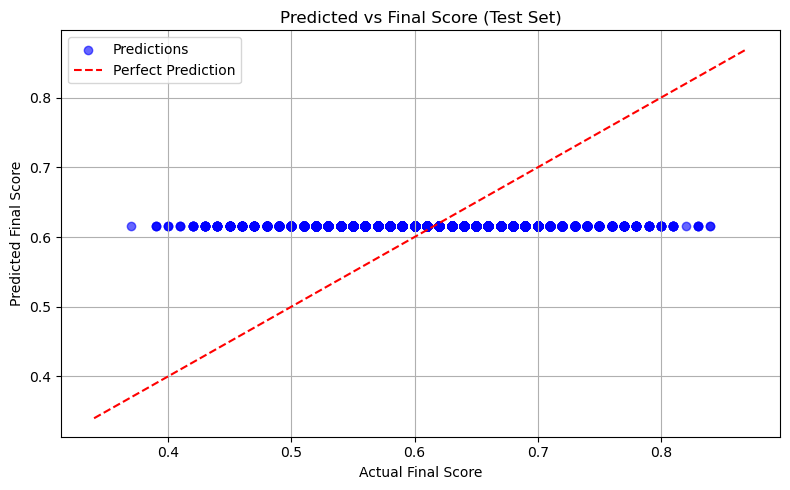

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Predict on validation and test sets
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Calculate RMSE
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print(f"Validation RMSE: {rmse_val:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")

# Visualization: Predicted vs Actual
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue', label="Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red', label="Perfect Prediction")
plt.xlabel("Actual Final Score")
plt.ylabel("Predicted Final Score")
plt.title("Predicted vs Final Score (Test Set)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show() 

## Hyperparameter Tuning
- Techniques: Grid Search, Random Search, or advanced methods like Bayesian Optimization.

In [49]:
# Define parameter grid for Random Search (for Linear Regression)
param_dist = {
    'fit_intercept': [True, False]  # Tuning if we want to include an intercept in the model
}

# Define the Linear Regression model
linear_model = LinearRegression()

# Adjust n_iter to the number of unique values in param_dist
n_iter = len(param_dist['fit_intercept'])  # Set n_iter to 2 (True, False)

# Set up RandomizedSearchCV for Linear Regression
random_search = RandomizedSearchCV(linear_model, param_distributions=param_dist, 
                                   n_iter=n_iter, cv=5, scoring='r2', 
                                   n_jobs=-1, random_state=42)

# Include both Father and Mother Degree as features
X_father_mother = df[['Father Degree', 'Mother Degree']]  # Independent variables for both father's and mother's education level
y_father_mother = df['Final Score']  # Dependent variable for the final score

# Fit the model
random_search.fit(X_father_mother, y_father_mother)

print(f"\n Random Search for Father's and Mother's Degree → Final Score:")
print(f" Best fit_intercept: {random_search.best_params_['fit_intercept']}")
print(f" Best R² score: {random_search.best_score_:.4f}")


 Random Search for Father's and Mother's Degree → Final Score:
 Best fit_intercept: True
 Best R² score: -0.0002


## Model Comparison
- Compare multiple models and justify the final model selection.

In [50]:
# Define the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1),  # Example with alpha=1
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Store results
results = {}

# Loop through the models
for model_name, model in models.items():
    # Perform cross-validation (using R² score)
    scores = cross_val_score(model, X_father_mother, y_father_mother, cv=5, scoring='r2')  # Use X_father_mother and y_father_mother
    results[model_name] = scores.mean()  # Mean R² score

# Display the results
for model_name, mean_r2 in results.items():
    print(f"{model_name} = {mean_r2:.4f}")

Linear Regression = -0.0002
Ridge Regression = -0.0002
Random Forest Regressor = -0.0009


## Visualization for Research Questions
- This section will include the visualizations that provide insights for the research questions defined earlier.  
- **Development Steps for Answering the Research Questions**:
  1. During **Exploratory Data Analysis (EDA)**, visualize initial patterns or trends related to the research questions.
  2. During **Model Evaluation**, provide visualizations to interpret model performance with respect to the research questions.
  3. During the **Final Analysis and Reporting**, present polished visualizations that summarize findings for each research question.

- Create the visualizations for each research question you defined, prove it or answer it, then add a markdown cell after each visual to comment and explain how the visual support your research question.

/var/folders/hn/y1n8zgb53074ppq1bk2gcphh0000gn/T/ipykernel_53074/3152927358.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_scores_father, x='Father Degree', y='Final Score', palette='Set2')
/var/folders/hn/y1n8zgb53074ppq1bk2gcphh0000gn/T/ipykernel_53074/3152927358.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_scores_mother, x='Mother Degree', y='Final Score', palette='Set2')


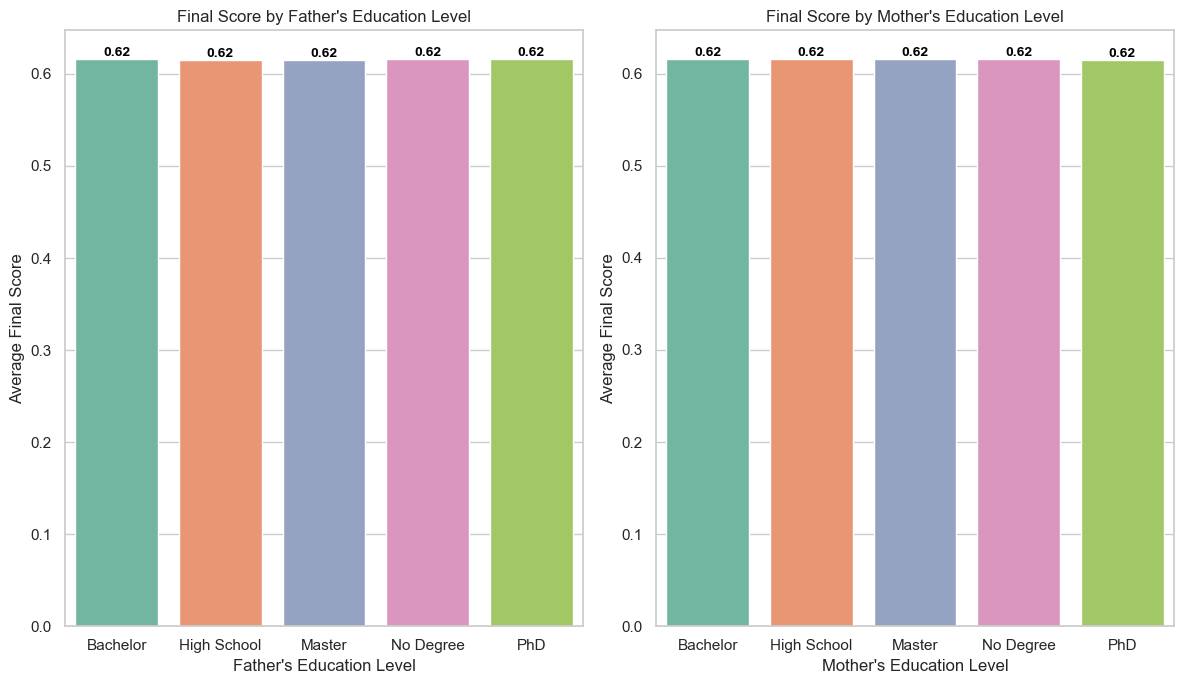

In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the new dataset
df = pd.read_csv('/Users/saifgamed/Desktop/studperlt2_normalized.csv')

# Check if 'average score' column exists, and if not, create it
if 'average score' not in df.columns:
    df['average score'] = df[['Final Score']].mean(axis=1)

# Group by Father's and Mother's Education level and calculate average final scores
avg_scores_father = df.groupby('Father Degree')[['Final Score']].mean().reset_index()
avg_scores_mother = df.groupby('Mother Degree')[['Final Score']].mean().reset_index()

# Create the plots for Father's and Mother's education levels
plt.figure(figsize=(12, 7))

# Plot for Father's Degree
plt.subplot(1, 2, 1)
sns.barplot(data=avg_scores_father, x='Father Degree', y='Final Score', palette='Set2')
plt.title('Final Score by Father\'s Education Level')
plt.xlabel('Father\'s Education Level')
plt.ylabel('Average Final Score')

for bar in plt.gca().patches:
    height = bar.get_height()
    plt.gca().annotate(f'{height:.2f}', 
                       (bar.get_x() + bar.get_width() / 2, height), 
                       ha='center', va='bottom',
                       fontsize=10, color='black', fontweight='bold')

# Plot for Mother's Degree
plt.subplot(1, 2, 2)
sns.barplot(data=avg_scores_mother, x='Mother Degree', y='Final Score', palette='Set2')
plt.title('Final Score by Mother\'s Education Level')
plt.xlabel('Mother\'s Education Level')
plt.ylabel('Average Final Score')

for bar in plt.gca().patches:
    height = bar.get_height()
    plt.gca().annotate(f'{height:.2f}', 
                       (bar.get_x() + bar.get_width() / 2, height), 
                       ha='center', va='bottom',
                       fontsize=10, color='black', fontweight='bold')

plt.tight_layout()
plt.show()

/var/folders/hn/y1n8zgb53074ppq1bk2gcphh0000gn/T/ipykernel_53074/2583746073.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_scores_system, x='Education Type', y='Final Score', palette='Set2')


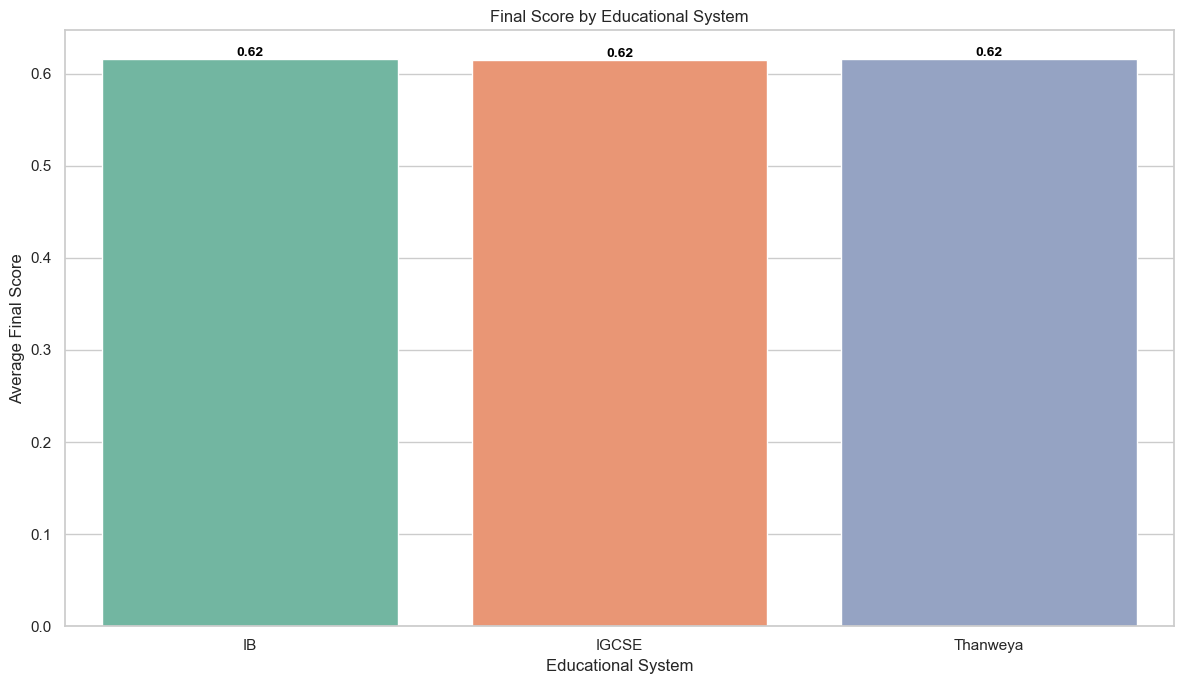

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the new dataset
df = pd.read_csv('/Users/saifgamed/Desktop/studperlt2_normalized.csv')

# Group by Educational System and calculate average final scores
avg_scores_system = df.groupby('Education Type')['Final Score'].mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 7))
sns.barplot(data=avg_scores_system, x='Education Type', y='Final Score', palette='Set2')

# Annotate bars
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.gca().annotate(f'{height:.2f}', 
                       (bar.get_x() + bar.get_width() / 2, height), 
                       ha='center', va='bottom',
                       fontsize=10, color='black', fontweight='bold')

# Final touches
plt.title('Final Score by Educational System')
plt.xlabel('Educational System')
plt.ylabel('Average Final Score')
plt.tight_layout()
plt.show()

/var/folders/hn/y1n8zgb53074ppq1bk2gcphh0000gn/T/ipykernel_53074/2594043492.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_scores_pressure, x='Academic Pressure', y='CGPA', palette='Set2')


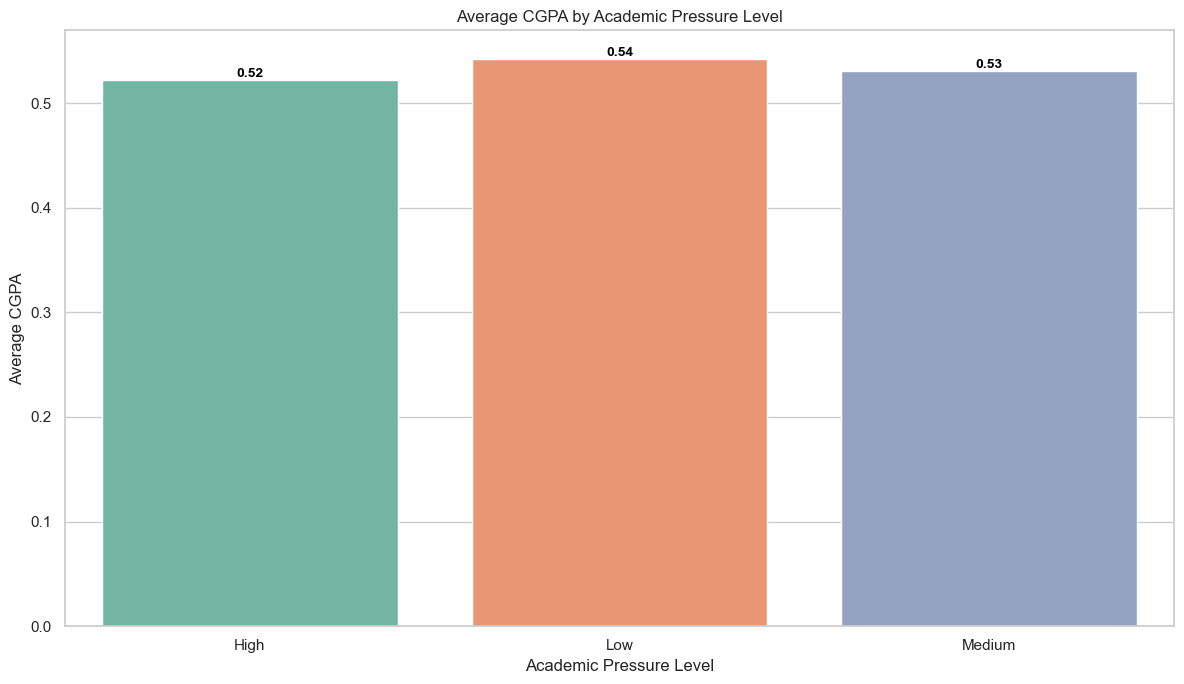

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df2 = pd.read_csv('/Users/saifgamed/Desktop/student_depression_normalized.csv')

# Ensure CGPA is numeric (convert if needed, errors='coerce' turns invalid entries to NaN)
df2['CGPA'] = pd.to_numeric(df2['CGPA'], errors='coerce')

# Drop rows where CGPA is missing after conversion
df2 = df2.dropna(subset=['CGPA'])

# Group by Academic Pressure and calculate average CGPA
avg_scores_pressure = df2.groupby('Academic Pressure')['CGPA'].mean().reset_index()

# Create the barplot
plt.figure(figsize=(12, 7))
sns.barplot(data=avg_scores_pressure, x='Academic Pressure', y='CGPA', palette='Set2')

# Annotate bars
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.gca().annotate(f'{height:.2f}',
                       (bar.get_x() + bar.get_width() / 2, height),
                       ha='center', va='bottom',
                       fontsize=10, color='black', fontweight='bold')

# Final plot settings
plt.title('Average CGPA by Academic Pressure Level')
plt.xlabel('Academic Pressure Level')
plt.ylabel('Average CGPA')
plt.tight_layout()
plt.show()

/var/folders/hn/y1n8zgb53074ppq1bk2gcphh0000gn/T/ipykernel_53074/382993255.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sentiment_counts, x='Sentiment', y='Count', palette='Set2')


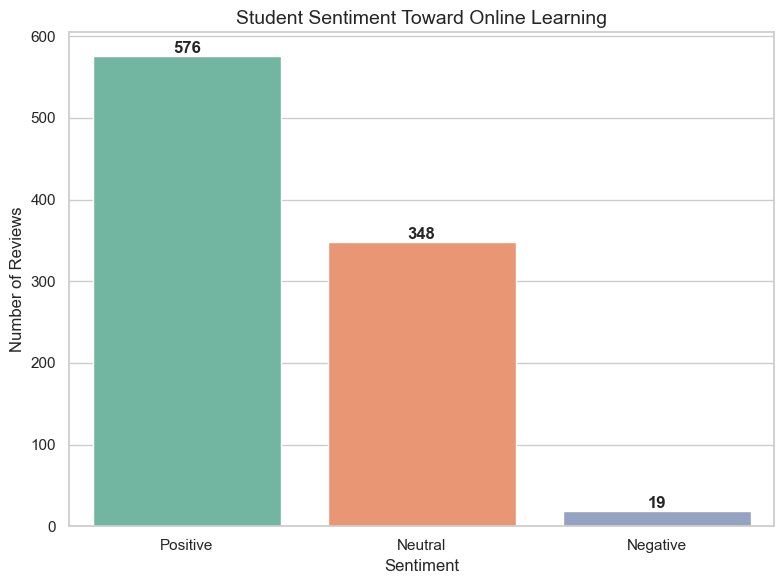

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/Users/saifgamed/Desktop/normalized_reviews.csv')

# Count the number of each sentiment
sentiment_counts = df['Sentiment'].value_counts().reset_index()
sentiment_counts.columns = ['Sentiment', 'Count']

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(data=sentiment_counts, x='Sentiment', y='Count', palette='Set2')

# Annotate bars
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.gca().annotate(f'{int(height)}',
                       (bar.get_x() + bar.get_width() / 2, height),
                       ha='center', va='bottom',
                       fontsize=12, fontweight='bold')

# Title and labels
plt.title('Student Sentiment Toward Online Learning', fontsize=14)
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()

# Milestone 4: Deployment and Monitoring

## Deployment
- Deploy the model as a REST API (Flask, FastAPI) or interactive dashboards (Streamlit, Dash).
- Host on cloud platforms (AWS, Azure, GCP) or local servers.

In [126]:
import streamlit as st
import joblib
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Cache the data loading and figure creation for performance
@st.cache_data
def load_data_and_create_figure():
    # Load the datasets
    reviews = pd.read_csv("/Users/saifgamed/Desktop/normalized_reviews.csv")
    depression = pd.read_csv("/Users/saifgamed/Desktop/student_depression_normalized.csv")
    performance = pd.read_csv("/Users/saifgamed/Desktop/studperlt2_normalized.csv")

    # Prepare data for plots
    final_score = performance['Final Score'].dropna()
    father_education = performance['Father Degree'].dropna()
    academic_pressure = depression['Academic Pressure'].dropna()
    cgpa = depression['CGPA'].dropna()
    satisfaction = reviews['Sentiment Score'].dropna()

    # Create a 2x2 subplot grid
    fig = make_subplots(rows=2, cols=2, 
                        subplot_titles=('Father Degree vs Final Score', 
                                        'Academic Pressure vs CGPA', 
                                        'Online Learning Satisfaction', 
                                        'Correlation Matrix'),
                        vertical_spacing=0.15,
                        horizontal_spacing=0.15)

    # Question 1: Father Degree vs Final Score
    fig.add_trace(
        go.Box(
            x=father_education,
            y=final_score,
            name='Father Degree vs Final Score',
            boxpoints='all',
            line=dict(color='orange'),
            fillcolor='rgba(255, 165, 0, 0.5)',
            opacity=0.7
        ),
        row=1, col=1
    )

    # Question 4: Academic Pressure vs CGPA
    fig.add_trace(
        go.Scatter(
            x=academic_pressure,
            y=cgpa,
            mode='markers',
            marker=dict(color='blue', opacity=0.5),
            name='Academic Pressure vs CGPA'
        ),
        row=1, col=2
    )

    # Question 3: Online learning satisfaction
    fig.add_trace(
        go.Histogram(
            x=satisfaction,
            nbinsx=20,
            histnorm='percent',
            name='Online Learning Satisfaction',
            marker=dict(color='green'),
            opacity=0.7
        ),
        row=2, col=1
    )

    # Correlation matrix
    corr_matrix = performance.select_dtypes(include=[np.number]).corr()
    fig.add_trace(
        go.Heatmap(
            z=corr_matrix.values,
            x=corr_matrix.columns,
            y=corr_matrix.columns,
            colorscale='RdBu',
            text=corr_matrix.values.round(2),
            texttemplate="%{text}",
            textfont={"size": 10},
            colorbar=dict(len=0.45, y=0.21, yanchor='middle')
        ),
        row=2, col=2
    )

    fig.update_layout(
        height=1200,
        width=1200,
        title_text="Student Performance and Online Learning Analysis",
        title_x=0.5,
        showlegend=True,
        barmode='group'
    )

    return performance, fig

# Load data and create the figure
performance, fig = load_data_and_create_figure()

# Streamlit Interface
st.title("Student Performance Analysis and Online Learning Insights")
st.subheader("Exploratory Data Analysis (EDA)")
st.plotly_chart(fig, use_container_width=True)

# Load pre-trained model and preprocessor
model = joblib.load('/Users/saifgamed/Desktop/student_performance_model.pkl')
preprocessor = joblib.load('/Users/saifgamed/Desktop/preprocessor.pkl')

# Prediction interface
st.subheader("Model Prediction")

col1, col2 = st.columns(2)
with col1:
    study_time = st.number_input("Study Time (hours/week)", min_value=0, max_value=50, value=10)
    academic_pressure_input = st.number_input("Academic Pressure", min_value=0, max_value=10, value=5)
with col2:
    age = st.number_input("Age", min_value=0, max_value=100, value=20)
    depression_level = st.number_input("Depression Level", min_value=0, max_value=10, value=3)

if st.button("Predict Performance"):
    input_data = pd.DataFrame([[study_time, academic_pressure_input, age, depression_level]],
                               columns=['StudyTime', 'Academic Pressure', 'Age', 'Depressio nLevel'])
    processed_data = preprocessor.transform(input_data)
    prediction = model.predict(processed_data)[0]
    st.header("Prediction Result")
    st.write(f"Predicted CGPA/Performance: {prediction:.2f}")


2025-04-19 17:29:04.817 No runtime found, using MemoryCacheStorageManager
2025-04-19 17:29:04.824 No runtime found, using MemoryCacheStorageManager
2025-04-19 17:29:04.826 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-19 17:29:04.827 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-19 17:29:04.828 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-19 17:29:05.139 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-19 17:29:05.139 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-19 17:29:05.144 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-19 17:29:05.145 Thread 'MainThread': missing ScriptRunContext! This warning can be ignor

## Monitoring
- Set up performance tracking and alert systems for issues.
- Monitor metrics for potential model drift or anomalies.

## Retraining Strategy
- Plan for periodic retraining with new or updated data.


---


# Milestone 5: Final Documentation and Presentation

## Final Report
- Summarize all project phases, including methodologies and insights.
- Provide actionable recommendations based on findings.

## Final Presentation
- Create a presentation for stakeholders, highlighting key results.
- Include a demo of the deployed application or model.

## Future Improvements
- Suggest areas for enhancement:
  - Incorporating more diverse data.
  - Experimenting with additional algorithms.
  - Optimizing deployment for scalability.

---

# Additional Sections

## Challenges Faced
- Document key challenges encountered during the project lifecycle.

## Lessons Learned
- Reflect on insights and skills gained through the project.

## References
- List resources for datasets, tools, and techniques utilized.

---

# More Sections for Specific Projects

## Ethical Considerations
- Discuss privacy, fairness, or other ethical implications.

## Business Impact
- Highlight how the findings address the original objective.

## Team Contributions
- Acknowledge contributions from team members and collaborators.


---


# Reflection: Data Science Lifecycle Steps and Big Data

Reflect on which steps of the data science lifecycle can and cannot be effectively applied to big data, and justify your answers:

## Steps That Can Be Used with Big Data

Create a list for the steps that can be used with big data with how each step can be used, why is such step applicable and an example tool used for such step in big data world.

Include tools, methods, or technologies that make these steps scalable.

## Steps That Are Challenging with Big Data

Create a list for the steps that are challenging with big data with the solution for the challenge, why is such step challenging and an example tool used for such step in big data world.

Explain why these steps are difficult and suggest potential solutions.

## Recommendations for Big Data Projects

Create a list for the recommendations you have for other data scientists willing to take your project with a big data approach.

---